In [73]:
import os

from fastai.data.external import untar_data, URLs

import torch
import torchvision
from torch.utils.data import random_split

In [74]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "/content/drive/MyDrive/Dental OPG (Classification)"

print(os.path.exists(dataset_path))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
True


In [75]:
print(os.listdir(dataset_path))
classes = os.listdir(dataset_path)
print(classes)

['Infection', 'Fractured Teeth', 'Caries', 'BDC-BDR', 'Healthy Teeth', 'Impacted teeth']
['Infection', 'Fractured Teeth', 'Caries', 'BDC-BDR', 'Healthy Teeth', 'Impacted teeth']


In [76]:
Caries = os.listdir(dataset_path + "/Caries")
print('No. of training examples for Caries:', len(Caries))
print(Caries[:5])

No. of training examples for Caries: 119
['10.jpg', '100.jpg', '1.jpg', '110.jpg', '104.jpg']


In [77]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [78]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_images():
    next_pix = []
    nrows = 3
    ncols = 2

    fig = plt.gcf()
    fig.set_size_inches(ncols * 5, nrows * 5)

    for i in range(len(classes)):
        class_path = os.path.join(dataset_path, classes[i])
        random_image = random.choice(os.listdir(class_path))
        img = mpimg.imread(os.path.join(class_path, random_image))

        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')
        plt.imshow(img)
        plt.title(classes[i])

    plt.show()


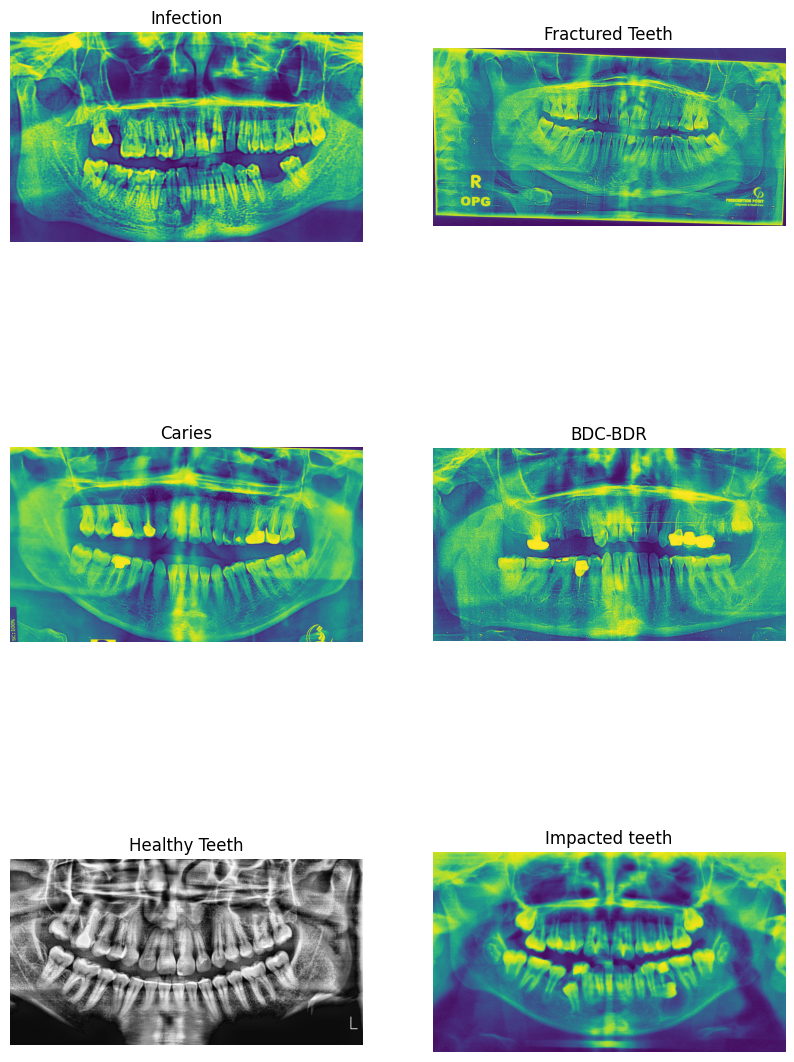

In [79]:
show_images()

In [80]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
data_dir = "/content/drive/MyDrive/Dental OPG (Classification)"

dataset = ImageFolder(
    root=data_dir,
    transform=transforms.ToTensor()
)

data_dir = "/content/drive/MyDrive/Dental OPG (Classification)"
dataset = ImageFolder(
    root=data_dir,
    transform=transform
)

In [81]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 224, 224]) 0


tensor([[[0.9020, 0.8784, 0.8392,  ..., 0.4471, 0.4196, 0.4078],
         [0.7922, 0.8118, 0.7686,  ..., 0.4706, 0.4275, 0.4941],
         [0.5961, 0.6941, 0.6863,  ..., 0.3529, 0.3765, 0.4157],
         ...,
         [0.2941, 0.3098, 0.3137,  ..., 0.4549, 0.3137, 0.3059],
         [0.3412, 0.3647, 0.3216,  ..., 0.2667, 0.2706, 0.2627],
         [0.3255, 0.3647, 0.3529,  ..., 0.1804, 0.2549, 0.2784]],

        [[0.9020, 0.8784, 0.8392,  ..., 0.4471, 0.4196, 0.4078],
         [0.7922, 0.8118, 0.7686,  ..., 0.4706, 0.4275, 0.4941],
         [0.5961, 0.6941, 0.6863,  ..., 0.3529, 0.3765, 0.4157],
         ...,
         [0.2941, 0.3098, 0.3137,  ..., 0.4549, 0.3137, 0.3059],
         [0.3412, 0.3647, 0.3216,  ..., 0.2667, 0.2706, 0.2627],
         [0.3255, 0.3647, 0.3529,  ..., 0.1804, 0.2549, 0.2784]],

        [[0.9020, 0.8784, 0.8392,  ..., 0.4471, 0.4196, 0.4078],
         [0.7922, 0.8118, 0.7686,  ..., 0.4706, 0.4275, 0.4941],
         [0.5961, 0.6941, 0.6863,  ..., 0.3529, 0.3765, 0.

In [82]:
print(dataset.classes)

['BDC-BDR', 'Caries', 'Fractured Teeth', 'Healthy Teeth', 'Impacted teeth', 'Infection']


In [83]:
def show_example(img, label):
    #print('Label: ', dataset.classes[label], "("+str(label)+")")
    print('Label No. : '+str(label))
    plt.title(dataset.classes[label])
    plt.imshow(img.permute(1, 2, 0))

Label No. : 5


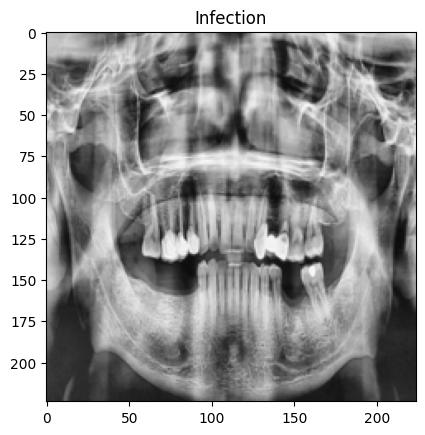

In [84]:
show_example(*dataset[511])

In [85]:
random_seed = 42
torch.manual_seed(random_seed)

In [86]:
val_size = int(len(dataset)*0.10)
train_size = int(len(dataset) - val_size)
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(466, 51)

In [87]:
from torch.utils.data.dataloader import DataLoader

batch_size=32

In [88]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=0, pin_memory=True)

In [89]:
img_size = 224
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset = ImageFolder(dataset_path, transform=transform)

In [90]:

val_size = int(len(dataset) * 0.10)
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])


In [91]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        images = images.cpu()  # Ensure images are on CPU
        fig, ax = plt.subplots(figsize=(30, 15))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break


In [92]:
import torch.nn as nn
import torch.nn.functional as F

In [93]:
simple_model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
)

In [94]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


In [95]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        acc = accuracy(out, labels)
        return loss,acc

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['train_accuracy'], result['val_loss'], result['val_acc']))

In [96]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DentalOPGCNN(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 112x112

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 56x56

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 28x28

            # Block 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 14x14

            # Block 5
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 7x7

            nn.Flatten(),
            nn.Linear(512*7*7, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 6)  # 6 classes for Dental OPG
        )

    def forward(self, xb):
        return self.network(xb)


In [97]:
model = DentalOPGCNN()
model


DentalOPGCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [98]:
pip install torchinfo

In [99]:
from torchinfo import summary
batch_size=32

summary(model, input_size=(batch_size, 3, 224,224))

Layer (type:depth-idx)                   Output Shape              Param #
DentalOPGCNN                             [32, 6]                   --
├─Sequential: 1-1                        [32, 6]                   --
│    └─Conv2d: 2-1                       [32, 32, 224, 224]        896
│    └─BatchNorm2d: 2-2                  [32, 32, 224, 224]        64
│    └─ReLU: 2-3                         [32, 32, 224, 224]        --
│    └─MaxPool2d: 2-4                    [32, 32, 112, 112]        --
│    └─Conv2d: 2-5                       [32, 64, 112, 112]        18,496
│    └─BatchNorm2d: 2-6                  [32, 64, 112, 112]        128
│    └─ReLU: 2-7                         [32, 64, 112, 112]        --
│    └─MaxPool2d: 2-8                    [32, 64, 56, 56]          --
│    └─Conv2d: 2-9                       [32, 128, 56, 56]         73,856
│    └─BatchNorm2d: 2-10                 [32, 128, 56, 56]         256
│    └─ReLU: 2-11                        [32, 128, 56, 56]         --
│   

In [100]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [101]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [102]:
device = get_default_device()
device

device(type='cpu')

In [103]:
img, label = dataset[0]
print(img.shape)  # Should be [3, 224, 224]


torch.Size([3, 224, 224])


In [104]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

DentalOPGCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [105]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func
    for epoch in (range(epochs)):
        # Training Phase
        model.train()
        train_losses = []
        train_accuracy= []
        for (batch_idx, batch) in enumerate(train_loader):
            loss,accuracy = model.training_step(batch)
            train_losses.append(loss)
            train_accuracy.append(accuracy)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            if batch_idx % 50 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, Accuracy: {:.4f}'.
                format(epoch+1, batch_idx , len(train_loader),
                       100. * batch_idx / len(train_loader), loss,accuracy))

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_accuracy'] = torch.stack(train_accuracy).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [106]:
model = to_device(DentalOPGCNN(), device)



In [107]:
evaluate(model, val_dl)

{'val_loss': 1.7862788438796997, 'val_acc': 0.09803921729326248}

In [108]:
num_epochs = 15
lr = 0.001
opt_func = torch.optim.Adam(model.parameters(),lr,amsgrad=True)

In [109]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Train Epoch: 1 [0/15 (0%)]	Loss: 1.788768, Accuracy: 0.1562
Epoch [1], train_loss: 14.6533, train_acc: 0.2671, val_loss: 4.6920, val_acc: 0.3529
Train Epoch: 2 [0/15 (0%)]	Loss: 9.995025, Accuracy: 0.3750
Epoch [2], train_loss: 4.8591, train_acc: 0.3380, val_loss: 2.7569, val_acc: 0.3529
Train Epoch: 3 [0/15 (0%)]	Loss: 1.998646, Accuracy: 0.5000
Epoch [3], train_loss: 1.7191, train_acc: 0.3609, val_loss: 1.5258, val_acc: 0.3137
Train Epoch: 4 [0/15 (0%)]	Loss: 1.460269, Accuracy: 0.4062
Epoch [4], train_loss: 1.5547, train_acc: 0.3708, val_loss: 1.5844, val_acc: 0.3529
Train Epoch: 5 [0/15 (0%)]	Loss: 1.739541, Accuracy: 0.3750
Epoch [5], train_loss: 1.5938, train_acc: 0.4056, val_loss: 1.5651, val_acc: 0.3137
Train Epoch: 6 [0/15 (0%)]	Loss: 1.493347, Accuracy: 0.4375
Epoch [6], train_loss: 1.5104, train_acc: 0.4282, val_loss: 1.5935, val_acc: 0.3529
Train Epoch: 7 [0/15 (0%)]	Loss: 1.438487, Accuracy: 0.4688
Epoch [7], train_loss: 1.5095, train_acc: 0.3868, val_loss: 1.5672, val_acc

In [114]:
def plot_accuracies(history):
    train_accuracies= [x['train_accuracy'] for x in history]
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-bx')
    plt.plot(train_accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Validation','Training'])
    plt.title('Accuracy vs. No. of epochs');

In [115]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

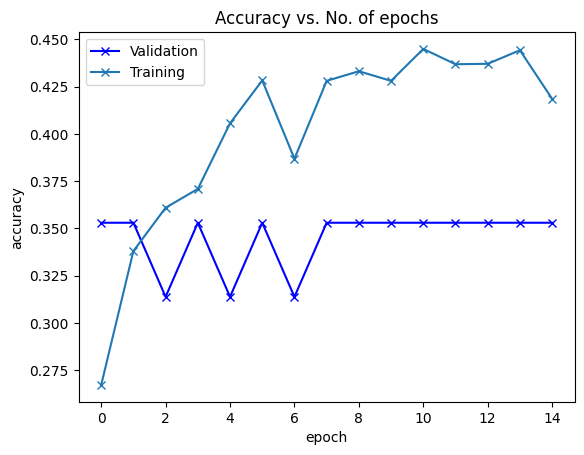

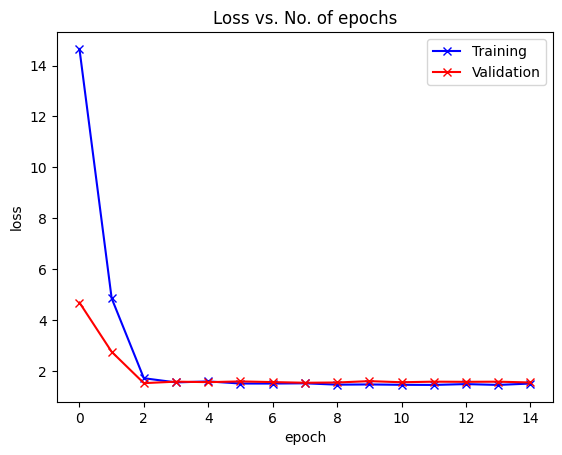

In [116]:
plot_accuracies(history)
plt.show()
plot_losses(history)

In [117]:
torch.save(model.state_dict(), '/content/dental-opg-cnn.pth')


In [118]:
from google.colab import files
files.download('/content/dental-opg-cnn.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>